LOADING THE DATASET

In [8]:
import zipfile

# Path to the zip file
zip_file_path = "MNIST.zip"
extract_to_path = "t10k-images-idx3-ubyte"
extract_to_path = "t10k-labels-idx1-ubyte"
extract_to_path = "train-images-idx3-ubyte"
extract_to_path = "train-labels-idx1-ubyte"


# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete!")


Extraction complete!


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
# Transform to convert images to tensors and normalize to range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale channel
])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.69MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



MAKING THE MODEL

In [14]:
# import torch.nn as nn
# import torch.nn.functional as F

# class MNIST_CNN(nn.Module):
#     def __init__(self):
#         super(MNIST_CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 128, kernel_size=3, padding=1)  # Input: 1 channel, Output: 32 channels
#         self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)  # Input: 32 channels, Output: 64 channels
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
#         self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
#         self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
#         x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
#         x = x.view(-1, 64 * 7 * 7)  # Flatten feature maps
#         x = F.relu(self.fc1(x))  # Fully connected layer -> ReLU
#         x = self.fc2(x)  # Output layer
#         return x


In [15]:
# import torch.nn as nn
# import torch.nn.functional as F

# class MNIST_CNN(nn.Module):
#     def __init__(self):
#         super(MNIST_CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # Input: 1 channel, Output: 32 channels
#         self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)  # Input: 32 channels, Output: 64 channels
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
#         self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
#         self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
#         x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
#         x = x.view(-1, 64 * 7 * 7)  # Flatten feature maps
#         x = F.relu(self.fc1(x))  # Fully connected layer -> ReLU
#         x = self.fc2(x)  # Output layer
#         return x


CNN Architecture

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input: 1 channel, Output: 32 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Input: 32 channels, Output: 64 channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = x.view(-1, 64 * 7 * 7)  # Flatten feature maps
        x = F.relu(self.fc1(x))  # Fully connected layer -> ReLU
        x = self.fc2(x)  # Output layer
        return x


In [18]:
import torch.optim as optim

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
model = MNIST_CNN().to(device)
# using cross entropy loss function
criterion = nn.CrossEntropyLoss()
# using the adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.1644
Epoch 2, Loss: 0.0448
Epoch 3, Loss: 0.0314
Epoch 4, Loss: 0.0230
Epoch 5, Loss: 0.0168
Epoch 6, Loss: 0.0144
Epoch 7, Loss: 0.0099
Epoch 8, Loss: 0.0102
Epoch 9, Loss: 0.0076
Epoch 10, Loss: 0.0079


Overall Test Accuracy: 99.27%


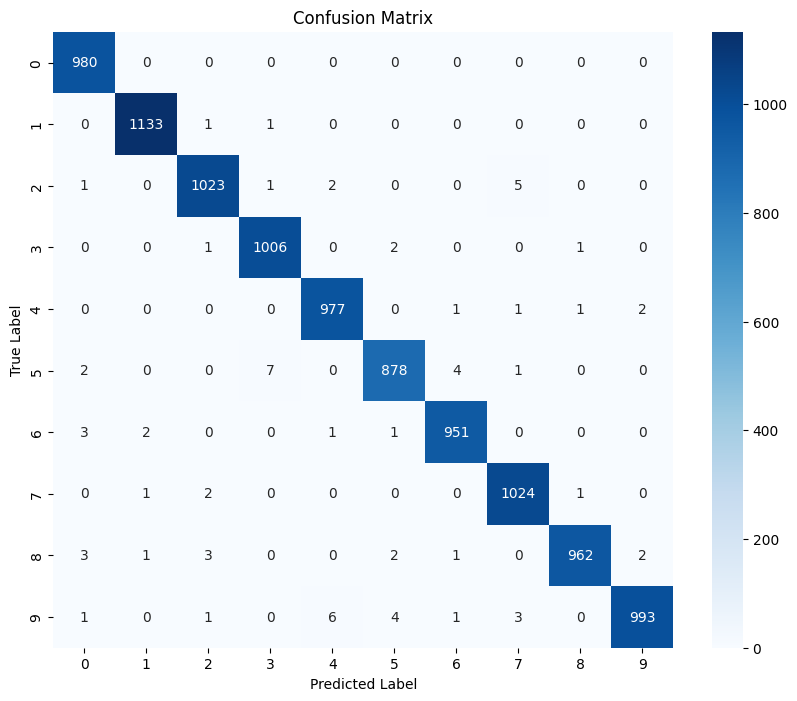


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_model_with_metrics(model, test_loader, device, class_names):
    """
    Evaluates the model and provides metrics such as accuracy, confusion matrix, and classification report.
    """
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Compute accuracy
    accuracy = np.mean(np.array(y_true) == np.array(y_pred)) * 100
    print(f"Overall Test Accuracy: {accuracy:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()  # Ensure the plot is displayed

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Example Usage
# After training your model and preparing your test_loader and device
class_names = [str(i) for i in range(10)]  # MNIST class names
evaluate_model_with_metrics(model, test_loader, device, class_names)


In [24]:
from torchvision import models

# Load a pretrained ResNet
pretrained_model = models.resnet18(pretrained=True)

# Modify the first convolution layer and final fully connected layer
pretrained_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)  # Adjust for 1 input channel
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 10)  # Adjust for 10 output classes

pretrained_model = pretrained_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


In [25]:
import torch.optim as optim

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pretrained ResNet model
from torchvision import models
pretrained_model = models.resnet18(pretrained=True)

# Modify the first convolutional layer and the final fully connected layer
pretrained_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)  # Adjust for grayscale input
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 10)  # Adjust for 10 output classes
pretrained_model = pretrained_model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.0001)  # Using a smaller learning rate for fine-tuning

# Training loop
for epoch in range(5):  # Fine-tune for fewer epochs
    pretrained_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = pretrained_model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.2673
Epoch 2, Loss: 0.0799
Epoch 3, Loss: 0.0508
Epoch 4, Loss: 0.0408
Epoch 5, Loss: 0.0338


Pretrained Model Test Accuracy: 87.44%


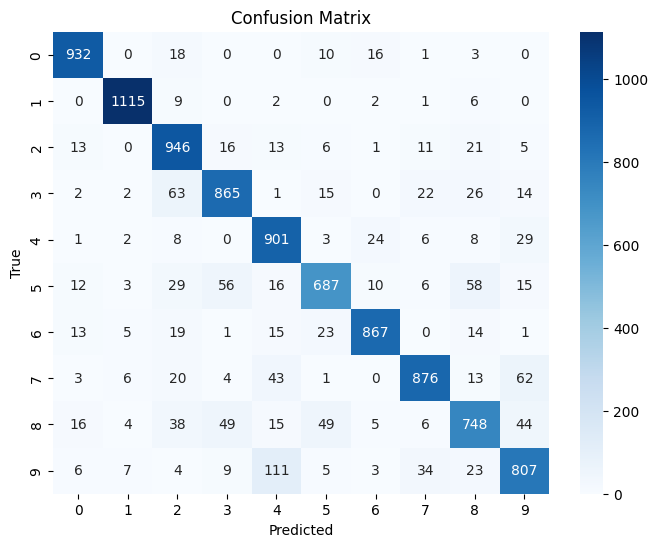

In [35]:
# Evaluation mode
pretrained_model.eval()

correct = 0
total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = pretrained_model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test accuracy
print(f"Pretrained Model Test Accuracy: {100 * correct / total:.2f}%")




# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



